# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_data = pd.merge(mouse_metadata, study_results, how='right')

# Reordering columns
combined_data = combined_data[['Mouse ID','Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]
# Display the data table for preview

combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [70]:
# Checking the number of mice.
mouse_count = len(pd.unique(combined_data['Mouse ID']))
mouse_count 

249

In [71]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
duplicate_mice = list(combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique())
duplicate_mice

['g989']

In [72]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_df = combined_data.loc[combined_data["Mouse ID"].isin(duplicate_mice)]
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [73]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.loc[combined_data["Mouse ID"].isin(duplicate_mice)==False]
clean_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [74]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count = len(pd.unique(clean_data['Mouse ID']))
new_mouse_count

248

In [75]:
print(clean_mmd_studyresults.columns)


Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


## Summary Statistics

In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_mean = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
summary_median = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
summary_variance = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
summary_std = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
summary_SEM = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df_dict = {
    'Mean Tumor Volume' : summary_mean,
    'Median Tumor Volume' : summary_median,
    'Tumor Volume Variance' : summary_variance,
    'Tumor Volume Std. Dev.' : summary_std,
    'Tumor Volume Std. Err.' : summary_SEM
}

summary_df = pd.DataFrame(summary_df_dict)

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [77]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_stats = clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [78]:
# Group Timepoints by Drug Regimen
timepoint_regimen = clean_data.groupby('Drug Regimen')['Timepoint'].count()

#need to put data in order from greatest to smallest
timepoint_regimen.sort_values(ascending = False, inplace = True)

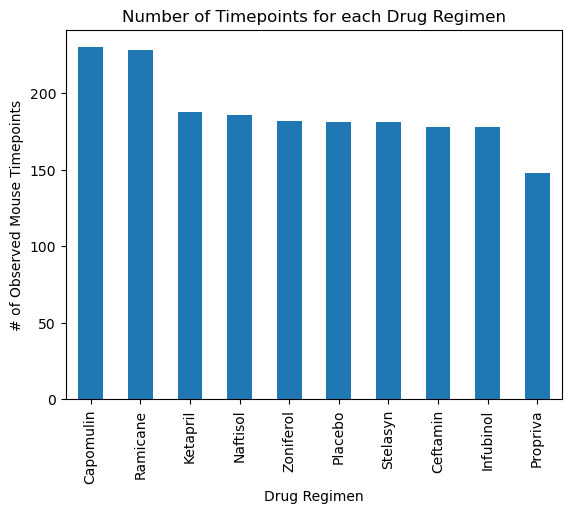

In [79]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_regimen_plotbar = timepoint_regimen.plot.bar()

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Number of Timepoints for each Drug Regimen')

plt.show()

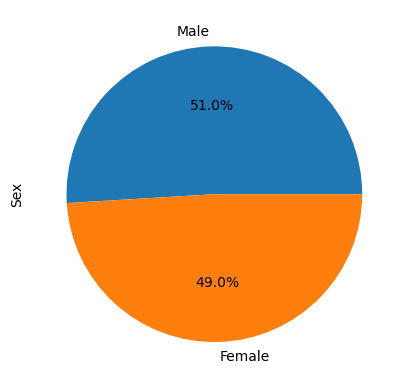

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = clean_data.groupby('Sex')['Sex'].count()

# Sort values to match colors of output
mouse_sex = mouse_sex.sort_values(ascending = False)
mouse_sex_plotpie = mouse_sex.plot.pie(x='Male', y='Female', autopct='%1.1f%%')

plt.show()


In [82]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [83]:
## Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_per_mouse = combined_data.groupby(['Mouse ID']).max()

# Need to reset index in order to merge with original data
max_per_mouse_reset = max_per_mouse.reset_index()

reset_max_mouse = max_per_mouse_reset[['Mouse ID', 'Timepoint']]


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_merge_data = reset_max_mouse.merge(combined_data, on = ['Mouse ID', 'Timepoint'], how = 'left')

In [84]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []
tumor_vol_data_plot = []

for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_data = max_merge_data.loc[max_merge_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    tumor_vol_data_plot.append(max_merge_data.loc[max_merge_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)'])
    
    # Separate data into quartiles
    quartiles = tumor_vol_data.quantile([.25,.5,.75])
    
    quartile_first = quartiles[0.25]
    quartile_third = quartiles[0.75]
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    inter_quartile_range = quartile_third - quartile_first
    # Determine outliers using upper and lower bounds
    lower_bound = quartile_first - (1.5 * inter_quartile_range)
    upper_bound = quartile_third + (1.5 * inter_quartile_range)

    #Use .loc with an "or" condition to find outliers outside of bounds
    possible_outliers = tumor_vol_data.loc[(tumor_vol_data < lower_bound) | (tumor_vol_data > upper_bound)].values
    outlier_count = tumor_vol_data.loc[(tumor_vol_data < lower_bound) | (tumor_vol_data > upper_bound)].count()
    
    print(f'{treatment} has an IQR of {inter_quartile_range} and {outlier_count} potential outliers:')
    if outlier_count >=1:
        print(f"{treatment}'s potential outliers include {possible_outliers}")
   
    tumor_vol_data = []
   

    # Determine outliers using upper and lower bounds


Capomulin has an IQR of 7.781863460000004 and 0 potential outliers:
Ramicane has an IQR of 9.098536719999998 and 0 potential outliers:
Infubinol has an IQR of 11.477135160000003 and 1 potential outliers:
Infubinol's potential outliers include [36.3213458]
Ceftamin has an IQR of 15.577752179999997 and 0 potential outliers:


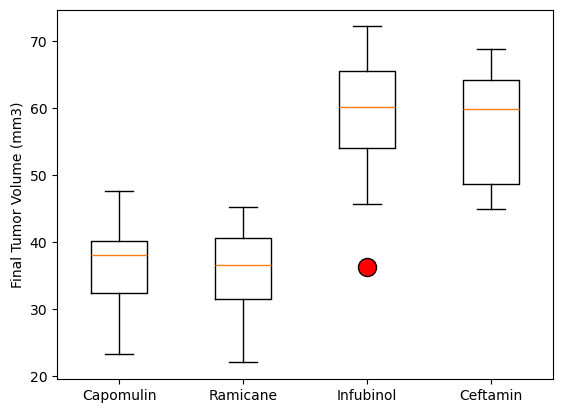

In [85]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


flierprops = dict(marker='o', markerfacecolor='r', markersize=13, markeredgecolor='black')

plt.boxplot(tumor_vol_data_plot, flierprops = flierprops)
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

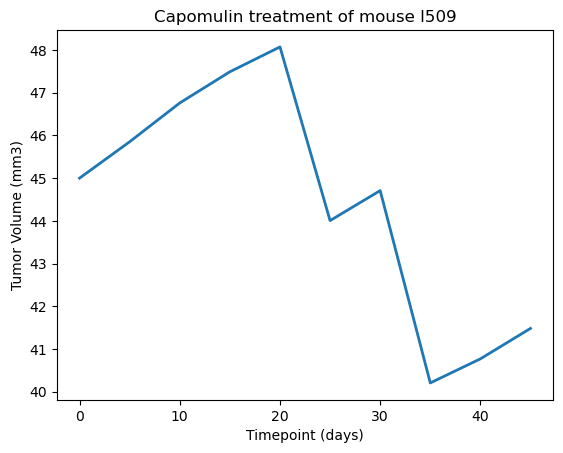

In [86]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Use .loc to only contain mice treated with Capomulin
capomulin_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]

# Create data frame of information for mouse l509
l509_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]


l509_timepoint = l509_df["Timepoint"]
l509_tumor_size = l509_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatment of mouse l509')
plt.plot(l509_timepoint, l509_tumor_size, linewidth=2)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

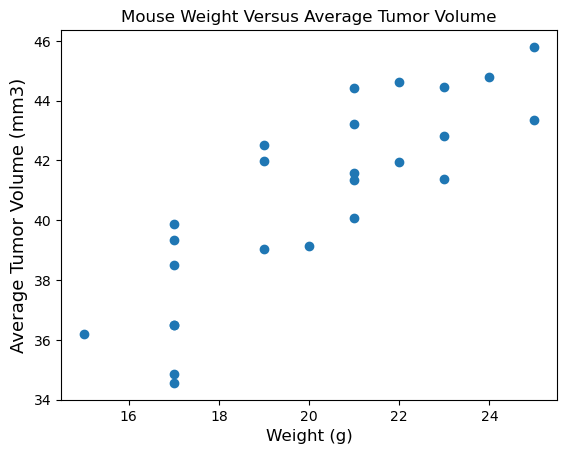

In [87]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

average_tumor_df = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
average_tumor_df = average_tumor_df.reset_index()
average_tumor_df = average_tumor_df.rename(columns = {'Tumor Volume (mm3)' : 'Avg Tumor Volume (mm3)'})

capomulin_df = capomulin_df.merge(average_tumor_df, on = 'Mouse ID', how = 'left') 
capomulin_df = capomulin_df[['Weight (g)', 'Avg Tumor Volume (mm3)']].drop_duplicates()
capomulin_x= capomulin_df['Weight (g)']
capomulin_y= capomulin_df['Avg Tumor Volume (mm3)']

# Plot scatter and format
plt.scatter(capomulin_x, capomulin_y)
plt.xlabel('Weight (g)',fontsize =12)
plt.ylabel('Average Tumor Volume (mm3)',fontsize =13)
plt.title('Mouse Weight Versus Average Tumor Volume')
marker_size=15
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


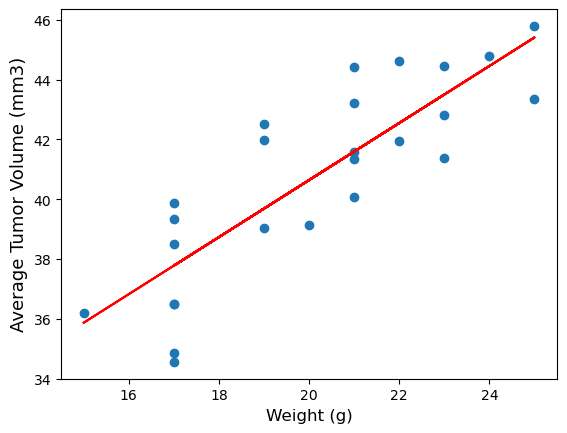

In [88]:

# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

corr_coefficient = st.pearsonr(capomulin_x, capomulin_y)

print(f"The correlation between mouse weight and the average tumor volume is {round(corr_coefficient[0],2)}.")

# Linear regression model

lin_reg = st.linregress(capomulin_x, capomulin_y) 

regress_plot = capomulin_x*lin_reg.slope + lin_reg.intercept

plt.scatter(capomulin_x, capomulin_y)
plt.plot(capomulin_x, regress_plot, color='red')
marker_size=15
plt.xlabel('Weight (g)',fontsize =12)
plt.ylabel('Average Tumor Volume (mm3)',fontsize =13)
plt.show()